## 1. The objective of the purposed research

- Ashlea Pin Jui Huang
- Theerawat Jingdapoo

For all we know, the housing prices depend on various factors. Furthermore, those factors also varies across different kind of markets. What we will be doing here is to help the mayor predict how the housing price is going in the future. 

In order to help buyers in the real estate to have a better understanding about the housing price, in this analysis, we will use dataset of the King County, USA to build a regression model that will help predicting the housing prices in this region.

As you can guess, there are different methods to achieve this, however, we are going to use linear regression to predict the prices. We will start with the simple model and then continue with the more complex ones then try to find the best model.

## 2. Data Exploration

In [1]:
d <- read.csv("kc_house_data.csv", stringsAsFactors = F)

In [2]:
str(d)
head(d)

'data.frame':	21613 obs. of  21 variables:
 $ id           : num  7.13e+09 6.41e+09 5.63e+09 2.49e+09 1.95e+09 ...
 $ date         : chr  "20141013T000000" "20141209T000000" "20150225T000000" "20141209T000000" ...
 $ price        : num  221900 538000 180000 604000 510000 ...
 $ bedrooms     : int  3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot     : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : int  7 7 6 7 8 11 7 7 7 7 ...
 $ sqft_above   : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement: int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : int  1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 ...
 $ yr_renovated :

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [3]:
d$date[grepl('2014', d$date)] <- '2014'
d$date[grepl('2015', d$date)] <- '2015'
colnames(d)[colnames(d)=='date'] <- 'year'
d$year <- as.factor(d$year)
levels(d$year)

[1] "2014" "2015"

After looking through the data, first, we want to change "date" variable. You can see that it has only 2 years: 2014 and 2015, so we decide to show only years. we know we are not doing Time Series right now but it would be easier for doing linear regression later on. 

In [4]:
head(d, 10)

id,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7129300520,2014,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2015,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,2014,1225000,4,4.50,5420,101930,1,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
1321400060,2014,257500,3,2.25,1715,6819,2,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
2008000270,2015,291850,3,1.50,1060,9711,1,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
2414600126,2015,229500,3,1.00,1780,7470,1,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
3793500160,2015,323000,3,2.50,1890,6560,2,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


## 3. Data Cleaning

After checking the data, there is no negative value , therefore, there is no need to clean that part.

In [5]:
duplicate.id <- d[duplicated(d$id),]
nrow(duplicate.id)

[1] 177

"id" variable means house. Using duplicated function, we can see that there are quite a few row with the same house, hence, we decide to delete the duplicated one and keep the one with year 2015.

In [6]:
d$year <- as.factor(d$year)
d1 <- d[order(d[,'id'],-d[,'year']),]
d1 <- d[!duplicated(d$id),]
d$year <- as.factor(d$year)

Warning message in Ops.factor(d[, "year"]):
"'-' not meaningful for factors"

In [7]:
duplicate.id1 <- d1[duplicated(d1$id),]
nrow(duplicate.id1)

[1] 0

Now, we do not have any duplicate house.

In [8]:
head(d1)

id,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7129300520,2014,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2015,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,2014,1225000,4,4.50,5420,101930,1,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [9]:
str(d1)

'data.frame':	21436 obs. of  21 variables:
 $ id           : num  7.13e+09 6.41e+09 5.63e+09 2.49e+09 1.95e+09 ...
 $ year         : Factor w/ 2 levels "2014","2015": 1 1 2 1 2 1 1 2 2 2 ...
 $ price        : num  221900 538000 180000 604000 510000 ...
 $ bedrooms     : int  3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot     : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : int  7 7 6 7 8 11 7 7 7 7 ...
 $ sqft_above   : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement: int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : int  1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 ...
 $ yr_renovated : int  0 1991 0 0 0 0 0 

In [10]:
maindata <- d1[,c('year','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated')]

We select only the variables that I want to work with.

In [11]:
maindata$year <- as.factor(maindata$year)
Year <- d[,"year"]
table(Year)

Year
 2014  2015 
14633  6980 

We can see that data in 2014 is more than 2 times of data in 2015. For more accurate, we decide to keep only year 2015.

In [12]:
maindata <- subset(maindata, year == '2015')

In [13]:
str(maindata)

'data.frame':	6837 obs. of  14 variables:
 $ year         : Factor w/ 2 levels "2014","2015": 2 2 2 2 2 2 2 2 2 2 ...
 $ price        : num  180000 510000 291850 229500 323000 ...
 $ bedrooms     : int  2 3 3 3 3 3 5 4 3 4 ...
 $ bathrooms    : num  1 2 1.5 1 2.5 2.5 2 3 1 2.5 ...
 $ sqft_living  : int  770 1680 1060 1780 1890 3560 1810 2950 1250 2570 ...
 $ sqft_lot     : int  10000 8080 9711 7470 6560 9796 4850 5000 9774 7173 ...
 $ floors       : num  1 1 1 1 2 1 1.5 2 1 2 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 3 3 3 3 3 4 3 ...
 $ grade        : int  6 8 7 7 7 8 7 9 7 8 ...
 $ sqft_above   : int  770 1680 1060 1050 1890 1860 1810 1980 1250 2570 ...
 $ sqft_basement: int  0 0 0 730 0 1700 0 970 0 0 ...
 $ yr_built     : int  1933 1987 1963 1960 2003 1965 1900 1979 1969 2005 ...
 $ yr_renovated : int  0 0 0 0 0 0 0 0 0 0 ...


## 4. Adaptation

In [14]:
table(maindata$grade)


   3    4    5    6    7    8    9   10   11   12   13 
   2   10   83  679 2890 1912  780  327  118   33    3 

In [15]:
table(maindata$condition)


   1    2    3    4    5 
  10   63 4575 1779  410 

In [16]:
maindata$avg.condi.grade <- with(maindata, ((grade/13*10)+(condition*2))/2)

In [17]:
maindata$age.of.house <- with(maindata, 2015-yr_built)

In [18]:
str(maindata)

'data.frame':	6837 obs. of  16 variables:
 $ year           : Factor w/ 2 levels "2014","2015": 2 2 2 2 2 2 2 2 2 2 ...
 $ price          : num  180000 510000 291850 229500 323000 ...
 $ bedrooms       : int  2 3 3 3 3 3 5 4 3 4 ...
 $ bathrooms      : num  1 2 1.5 1 2.5 2.5 2 3 1 2.5 ...
 $ sqft_living    : int  770 1680 1060 1780 1890 3560 1810 2950 1250 2570 ...
 $ sqft_lot       : int  10000 8080 9711 7470 6560 9796 4850 5000 9774 7173 ...
 $ floors         : num  1 1 1 1 2 1 1.5 2 1 2 ...
 $ waterfront     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition      : int  3 3 3 3 3 3 3 3 4 3 ...
 $ grade          : int  6 8 7 7 7 8 7 9 7 8 ...
 $ sqft_above     : int  770 1680 1060 1050 1890 1860 1810 1980 1250 2570 ...
 $ sqft_basement  : int  0 0 0 730 0 1700 0 970 0 0 ...
 $ yr_built       : int  1933 1987 1963 1960 2003 1965 1900 1979 1969 2005 ...
 $ yr_renovated   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ avg.condi.grade: num  5.31 6.08 5.69 5.69 5.69 ...
 $ age.of.house   : num  82 28 52 55 1

In [19]:
head(maindata)

,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,avg.condi.grade,age.of.house
3,2015,180000,2,1.0,770,10000,1,0,3,6,770,0,1933,0,5.307692,82
5,2015,510000,3,2.0,1680,8080,1,0,3,8,1680,0,1987,0,6.076923,28
8,2015,291850,3,1.5,1060,9711,1,0,3,7,1060,0,1963,0,5.692308,52
9,2015,229500,3,1.0,1780,7470,1,0,3,7,1050,730,1960,0,5.692308,55
10,2015,323000,3,2.5,1890,6560,2,0,3,7,1890,0,2003,0,5.692308,12
11,2015,662500,3,2.5,3560,9796,1,0,3,8,1860,1700,1965,0,6.076923,50


Firat, we add 1 column "avg.condi.grade". We recalculate the score of grade and condition to be maximum at 10 first then average them. Bacause condition and score are similar, average of condition and score can be an important data.
 
In addition, We also add 1 more column "age.of.house", calculate by 2015 - the year that the house was built. Bacause age of the house can be a factor to the price too.

## 5. Descriptive Visualization

### 5.1 year built

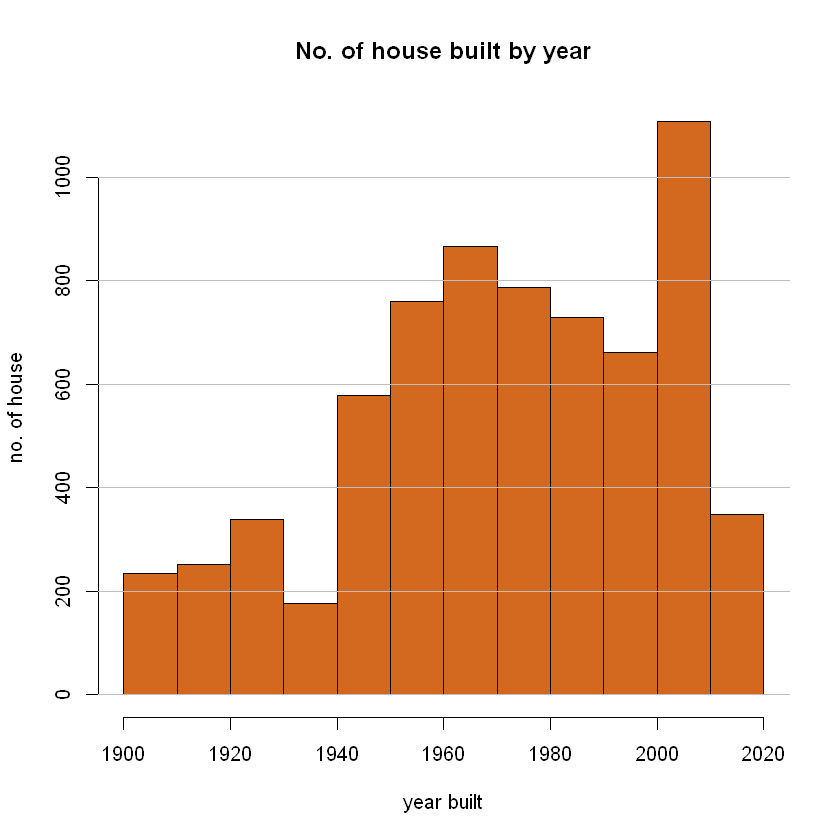

In [20]:
hist(maindata$yr_built, col = "chocolate", xlab = "year built", ylab = "no. of house", main = "No. of house built by year")
grid(nx=NA,ny=NULL,lty=1,lwd=1,col="grey")

    We can see that from this data, from 1940 to before 2000, the number of house built were around 600 to 900 houses but after 2010, the number of house built jump to more than 1000 houses.

In [21]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


### 5.2 average of condition and grade

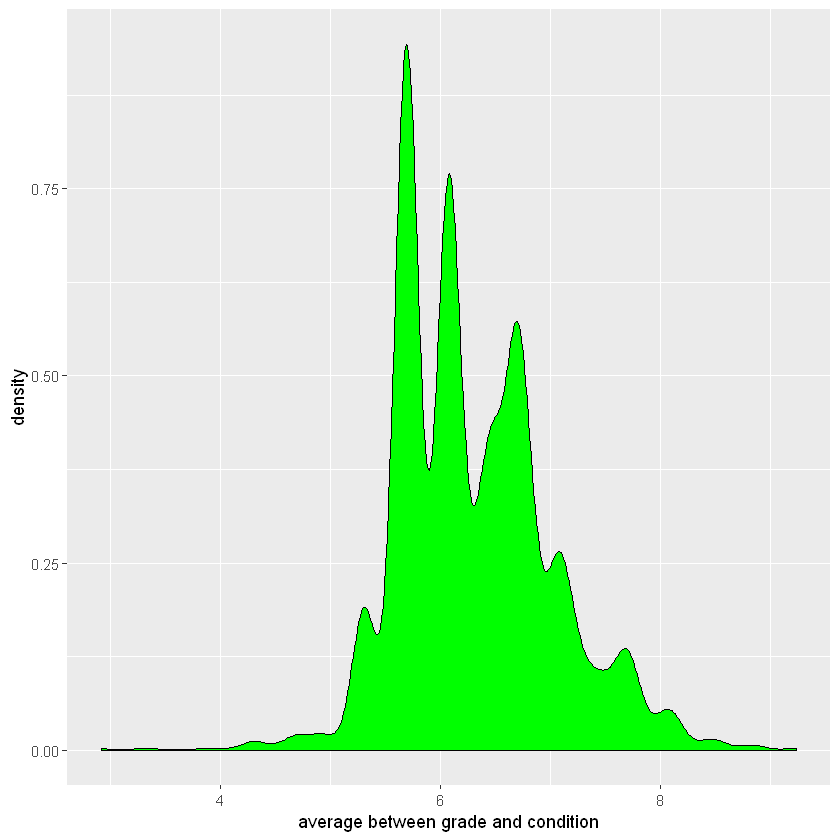

In [61]:
gg <- ggplot(data = maindata, aes(x = avg.condi.grade)) + geom_density(fill = 'green')
gg + xlab('average between grade and condition')

Most houses have the average between grade and condition from 5.5 to 7. almost looks like a normal distribution.

In [23]:
library(magrittr)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



### 5.3 number of bedroom

In [24]:
group.bed <- maindata %>%
group_by(bedrooms) %>%
summarize(frequency=n())
group.bed <- group.bed[2:5,]
group.bed <- rbind(group.bed, c("5 and more", 607))
group.bed$frequency <- as.numeric(group.bed$frequency)
group.bed

bedrooms,frequency
1,58
2,895
3,3140
4,2133
5 and more,607


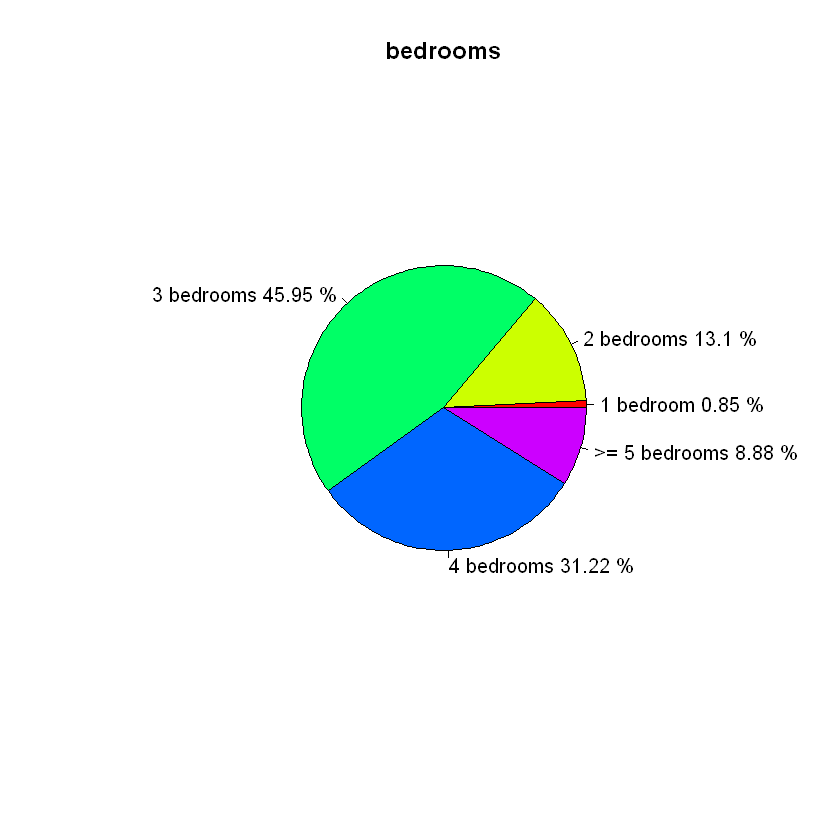

In [25]:
pct = (group.bed$frequency/sum(group.bed$frequency))*100
pct = round(pct,2)
labels = c("1 bedroom","2 bedrooms","3 bedrooms","4 bedrooms",">= 5 bedrooms")
labels = paste(labels,pct, "%")
pie(pct, main="bedrooms", radius = 0.5, labels = labels, col = rainbow(nrow(group.bed)))

 Most houses in this dataset, almost 50% of them has 3 bedrooms, about 30% of them has 4 bedrooms and about 13% of them has 2 bedrooms, 1 bedroom is only 0.85%. Moreover, 8.88% of the houses in this dataset has bedrooms more than or equal to 5.

### 5.4 number of bathroom

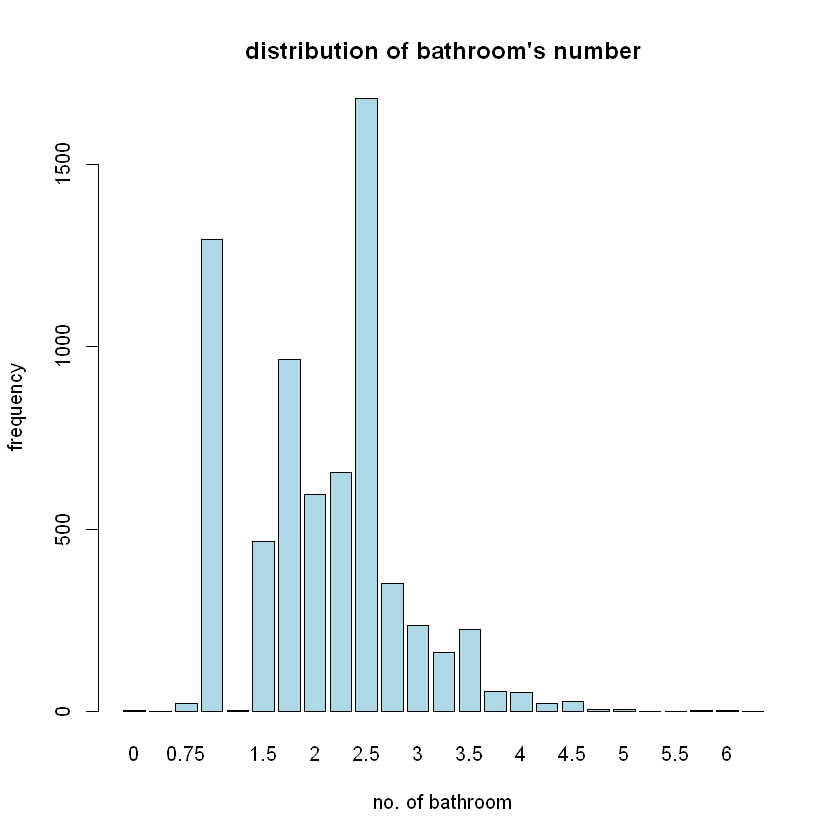

In [26]:
no.bath <- table(maindata$bathrooms)
barplot(no.bath, xlab = "no. of bathroom", ylab = "frequency", main = "distribution of bathroom's number", col = "lightblue")

 from this data, if the house doesnt have 2.5 bathrooms, then it tends to have only 1 bathroom or 1.75 bathrooms.

In [27]:
str(maindata)

'data.frame':	6837 obs. of  16 variables:
 $ year           : Factor w/ 2 levels "2014","2015": 2 2 2 2 2 2 2 2 2 2 ...
 $ price          : num  180000 510000 291850 229500 323000 ...
 $ bedrooms       : int  2 3 3 3 3 3 5 4 3 4 ...
 $ bathrooms      : num  1 2 1.5 1 2.5 2.5 2 3 1 2.5 ...
 $ sqft_living    : int  770 1680 1060 1780 1890 3560 1810 2950 1250 2570 ...
 $ sqft_lot       : int  10000 8080 9711 7470 6560 9796 4850 5000 9774 7173 ...
 $ floors         : num  1 1 1 1 2 1 1.5 2 1 2 ...
 $ waterfront     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition      : int  3 3 3 3 3 3 3 3 4 3 ...
 $ grade          : int  6 8 7 7 7 8 7 9 7 8 ...
 $ sqft_above     : int  770 1680 1060 1050 1890 1860 1810 1980 1250 2570 ...
 $ sqft_basement  : int  0 0 0 730 0 1700 0 970 0 0 ...
 $ yr_built       : int  1933 1987 1963 1960 2003 1965 1900 1979 1969 2005 ...
 $ yr_renovated   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ avg.condi.grade: num  5.31 6.08 5.69 5.69 5.69 ...
 $ age.of.house   : num  82 28 52 55 1

### 5.5 price and sqft lot

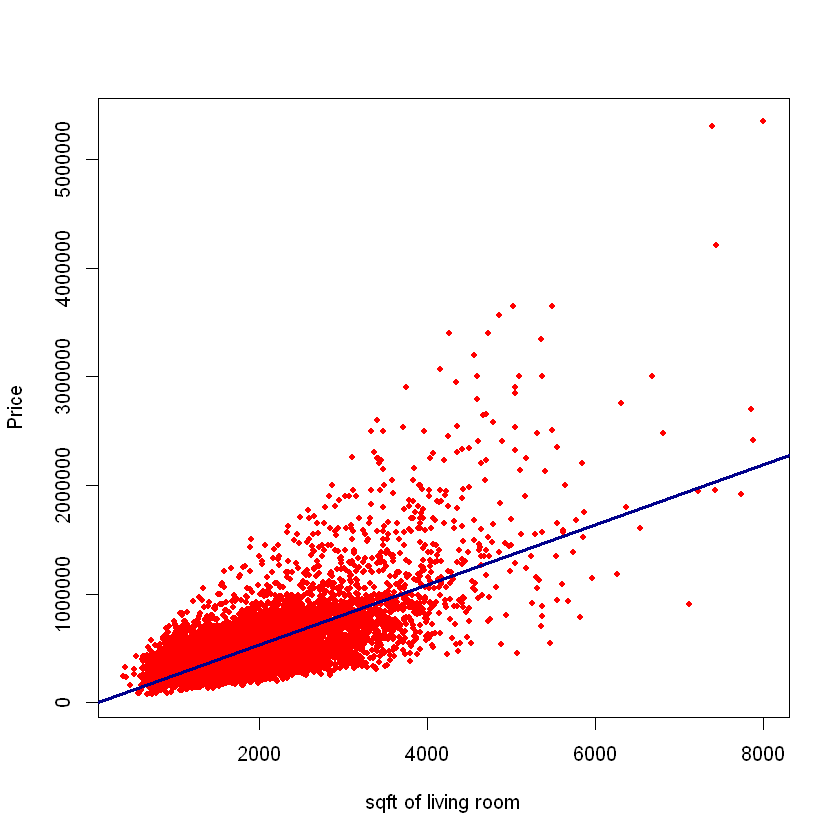

In [62]:
plot(maindata$sqft_living, maindata$price, pch=20, col='red', xlab="sqft of living room", ylab="Price")
options(scipen=4)
model <- lm(price~sqft_living, data = maindata)
abline(model, col="darkblue",lwd=3)

    We can see the positive correlation between price and how big is the living room. the bigger the living room, the higher the price.

## 6. Response Variable

        For this project, the numerical continuous response variable is price. It's simple, we want to predict the price of house by using linear regression because from this dataset, it makes most sense to predict.

## 7. Explore Correlations

In [29]:
library(psych)


Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha



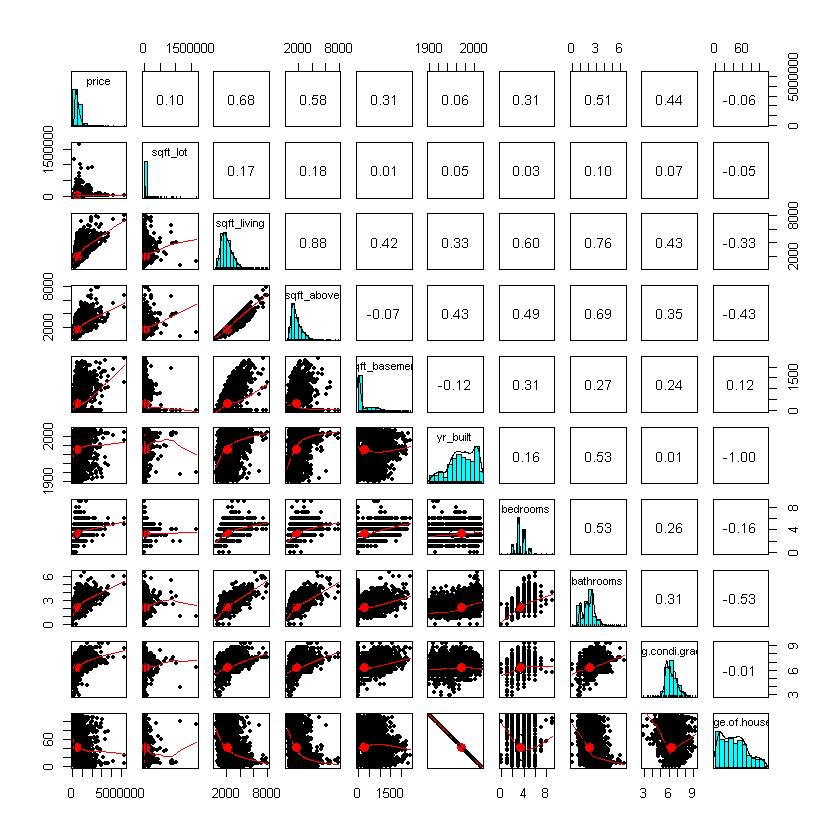

In [30]:
pairs.panels(maindata[c("price","sqft_lot",'sqft_living','sqft_above','sqft_basement','yr_built','bedrooms','bathrooms','avg.condi.grade','age.of.house')])

     We use pairs.panels from (library(psych)) and we select the column that we want to see the corelations between price and them, including; sqft_lot, sqft_living, sqft_above, sqft_basement, yr_built, bedrooms, bathrooms, avg.condi.grade and age.of.house.
     
     From the function we can see that sqft_lot and yr_built have a very small corelations to price. For sqft_basement, bedrooms and avg.condi.grade, the corelations are 0.31, 0.31 and 0.44, respectively. Moreover, the top 3 biggest corelations go to sqft_living (0.68), sqft_above(0.58) and bathrooms(0.51)

## 8. Simple Linear Regression

### 8.1 Price ~ sqft_lot

In [31]:
s1 <- lm(price~sqft_lot, data = maindata)
summary.lm(s1)


Call:
lm(formula = price ~ sqft_lot, data = maindata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1191587  -217186   -87932   100591  4800700 

Coefficients:
                Estimate   Std. Error t value Pr(>|t|)    
(Intercept) 531801.08780   4598.04402 115.658  < 2e-16 ***
sqft_lot         0.72956      0.08954   8.148 4.38e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 362500 on 6835 degrees of freedom
Multiple R-squared:  0.009619,	Adjusted R-squared:  0.009474 
F-statistic: 66.38 on 1 and 6835 DF,  p-value: 4.38e-16


very significant p-value with adjusted R-squared of 0.009474 

### 8.2 Price ~ sqft_living

In [32]:
s2 <- lm(price~sqft_living, data = maindata)
summary.lm(s2)


Call:
lm(formula = price ~ sqft_living, data = maindata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1046881  -155014   -26996   107228  3278391 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -23726.267   8056.005  -2.945  0.00324 ** 
sqft_living    276.771      3.604  76.793  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 266900 on 6835 degrees of freedom
Multiple R-squared:  0.4632,	Adjusted R-squared:  0.4631 
F-statistic:  5897 on 1 and 6835 DF,  p-value: < 2.2e-16


very significant p-value with adjusted R-squared of 0.4631 

### 8.3 Price ~ bedrooms

In [33]:
s3 <- lm(price~bedrooms, data = maindata)
summary.lm(s3)


Call:
lm(formula = price ~ bedrooms, data = maindata)

Residuals:
    Min      1Q  Median      3Q     Max 
-757833 -207795  -68010  103813 4598990 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   117972      16177   7.293 3.38e-13 ***
bedrooms      126608       4654  27.207  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 346000 on 6835 degrees of freedom
Multiple R-squared:  0.09771,	Adjusted R-squared:  0.09758 
F-statistic: 740.2 on 1 and 6835 DF,  p-value: < 2.2e-16


very significant p-value with adjusted R-squared of 0.09758

### 8.4 Price ~ average between grade and condition

In [34]:
s4 <- lm(price~avg.condi.grade, data = maindata)
summary.lm(s4)


Call:
lm(formula = price ~ avg.condi.grade, data = maindata)

Residuals:
    Min      1Q  Median      3Q     Max 
-687167 -169382  -44382  106468 4507325 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -889005      35471  -25.06   <2e-16 ***
avg.condi.grade   227392       5597   40.63   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 326900 on 6835 degrees of freedom
Multiple R-squared:  0.1945,	Adjusted R-squared:  0.1944 
F-statistic:  1651 on 1 and 6835 DF,  p-value: < 2.2e-16


very significant p-value with adjusted R-squared of 0.1944

### 8.5 age of house

In [35]:
s5 <- lm(price~age.of.house, data = maindata)
summary.lm(s5)


Call:
lm(formula = price ~ age.of.house, data = maindata)

Residuals:
    Min      1Q  Median      3Q     Max 
-464062 -223102  -87553  102114 4778898 

Coefficients:
             Estimate Std. Error t value    Pr(>|t|)    
(Intercept)  575572.3     7910.6  72.760     < 2e-16 ***
age.of.house   -745.1      150.9  -4.937 0.000000813 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 363600 on 6835 degrees of freedom
Multiple R-squared:  0.003553,	Adjusted R-squared:  0.003407 
F-statistic: 24.37 on 1 and 6835 DF,  p-value: 0.0000008131


quite significant p-value with adjusted Rsquared of 0.0000008131

### the best SLR

<font color = red>$Price = -23726.267 + 276.771sqft living$ </font>
 
is the best SLR I got with very significant p-value and the adjusted R-squared of 0.4631.

## 9. Multiple Linear Regression

### 9.1 Price ~ sqft_lot + sqft_living + sqft_above

In [36]:
m1 <- lm(price ~ sqft_lot + sqft_living + sqft_above, data = maindata)
summary.lm(m1)


Call:
lm(formula = price ~ sqft_lot + sqft_living + sqft_above, data = maindata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1058115  -154212   -25692   106602  3246273 

Coefficients:
                Estimate   Std. Error t value Pr(>|t|)    
(Intercept) -20438.70877   8127.03869  -2.515  0.01193 *  
sqft_lot        -0.10154      0.06694  -1.517  0.12937    
sqft_living    299.50925      7.50617  39.902  < 2e-16 ***
sqft_above     -27.33730      8.26786  -3.306  0.00095 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 266600 on 6833 degrees of freedom
Multiple R-squared:  0.4643,	Adjusted R-squared:  0.464 
F-statistic:  1974 on 3 and 6833 DF,  p-value: < 2.2e-16


### 9.2 Price ~ sqft_living + sqft_above

In [37]:
m2 <- lm(price ~ sqft_living + sqft_above, data = maindata)
summary.lm(m2)


Call:
lm(formula = price ~ sqft_living + sqft_above, data = maindata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1056274  -153818   -26359   106852  3249417 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -20012.831   8122.960  -2.464 0.013774 *  
sqft_living    299.239      7.505  39.873  < 2e-16 ***
sqft_above     -28.156      8.251  -3.412 0.000648 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 266700 on 6834 degrees of freedom
Multiple R-squared:  0.4641,	Adjusted R-squared:  0.4639 
F-statistic:  2959 on 2 and 6834 DF,  p-value: < 2.2e-16


In [38]:
anova(m1,m2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
6833,485750273811442,NA,NA,NA,NA
6834,485913822593947,-1,-163548782504,2.300624,0.1293683


**p-value is not significant, so i decide to  remove variable "sqft_lot" out from the equation**

### 9.3 Price ~ sqft_living + sqft_above + yr_built

In [39]:
m3 <- lm(price ~ sqft_living + sqft_above + yr_built, data = maindata)
summary.lm(m3)


Call:
lm(formula = price ~ sqft_living + sqft_above + yr_built, data = maindata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1087191  -149188   -23624   107757  3208806 

Coefficients:
               Estimate  Std. Error t value Pr(>|t|)    
(Intercept) 4807106.999  233244.248  20.610  < 2e-16 ***
sqft_living     283.475       7.320  38.726  < 2e-16 ***
sqft_above       25.453       8.413   3.026  0.00249 ** 
yr_built      -2480.189     119.773 -20.707  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 258700 on 6833 degrees of freedom
Multiple R-squared:  0.4957,	Adjusted R-squared:  0.4955 
F-statistic:  2239 on 3 and 6833 DF,  p-value: < 2.2e-16


In [40]:
anova(m2,m3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
6834,485913822593947,NA,NA,NA,NA
6833,457221513659106,1,28692308934841,428.7955,1.954534e-92


**model3 is better than model2**

### 9.4 Price ~ sqft_living + sqft_above + age.of.house

In [41]:
m4 <- lm(price ~ sqft_living + sqft_above + age.of.house, data = maindata)
summary.lm(m4)


Call:
lm(formula = price ~ sqft_living + sqft_above + age.of.house, 
    data = maindata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1087191  -149188   -23624   107757  3208806 

Coefficients:
                Estimate  Std. Error t value Pr(>|t|)    
(Intercept)  -190474.072   11395.601 -16.715  < 2e-16 ***
sqft_living      283.475       7.320  38.726  < 2e-16 ***
sqft_above        25.453       8.413   3.026  0.00249 ** 
age.of.house    2480.189     119.773  20.707  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 258700 on 6833 degrees of freedom
Multiple R-squared:  0.4957,	Adjusted R-squared:  0.4955 
F-statistic:  2239 on 3 and 6833 DF,  p-value: < 2.2e-16


**model3 has the same significant and the same adjusted R-squared as model4, I choose to continue with model3**

### 9.5 Price ~ sqft_living + sqft_above + yr_built + bedrooms

In [42]:
m5 <- lm(price ~ sqft_living + sqft_above + yr_built + bedrooms, data = maindata)
summary.lm(m5)


Call:
lm(formula = price ~ sqft_living + sqft_above + yr_built + bedrooms, 
    data = maindata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1180037  -140737   -21324   105910  3162658 

Coefficients:
               Estimate  Std. Error t value Pr(>|t|)    
(Intercept) 5047226.273  230159.275  21.929   <2e-16 ***
sqft_living     328.649       7.822  42.016   <2e-16 ***
sqft_above       17.396       8.299   2.096   0.0361 *  
yr_built      -2533.347     117.951 -21.478   <2e-16 ***
bedrooms     -63613.436    4286.363 -14.841   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 254600 on 6832 degrees of freedom
Multiple R-squared:  0.5115,	Adjusted R-squared:  0.5112 
F-statistic:  1788 on 4 and 6832 DF,  p-value: < 2.2e-16


In [43]:
anova(m3,m5)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
6833,457221513659106,NA,NA,NA,NA
6832,442941827301177,1,14279686357929,220.252,4.603068e-49


**model5 is now better than model 3**

### 9.6 Price ~ sqft_living + sqft_above + yr_built + bedrooms + bathrooms

In [44]:
m6 <- lm(price ~ sqft_living + sqft_above + yr_built + bedrooms + bathrooms, data = maindata)
summary.lm(m6)


Call:
lm(formula = price ~ sqft_living + sqft_above + yr_built + bedrooms + 
    bathrooms, data = maindata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1265192  -139276   -19346   103634  3092307 

Coefficients:
               Estimate  Std. Error t value Pr(>|t|)    
(Intercept) 6526889.901  253082.755  25.790  < 2e-16 ***
sqft_living     278.432       8.599  32.381  < 2e-16 ***
sqft_above       24.180       8.210   2.945  0.00324 ** 
yr_built      -3317.522     130.568 -25.408  < 2e-16 ***
bedrooms     -74149.269    4306.003 -17.220  < 2e-16 ***
bathrooms     92061.768    6929.511  13.285  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 251400 on 6831 degrees of freedom
Multiple R-squared:  0.5238,	Adjusted R-squared:  0.5234 
F-statistic:  1503 on 5 and 6831 DF,  p-value: < 2.2e-16


In [45]:
anova(m5,m6)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
6832,442941827301177,NA,NA,NA,NA
6831,431785101313282,1,11156725987895,176.5035,8.733736e-40


**test shows that the variable "bathrooms" is significant, hence, model6 is better than model5**

### 9.7 Price ~ sqft_living + sqft_above + yr_built + bedrooms + bathrooms + avg.condi.grade

In [46]:
m7 <- lm(price ~ sqft_living + sqft_above + yr_built + bedrooms + bathrooms + avg.condi.grade, data = maindata)
summary.lm(m7)


Call:
lm(formula = price ~ sqft_living + sqft_above + yr_built + bedrooms + 
    bathrooms + avg.condi.grade, data = maindata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1221757  -136356   -19361   101316  3073378 

Coefficients:
                   Estimate  Std. Error t value Pr(>|t|)    
(Intercept)     5504629.927  256810.217  21.435  < 2e-16 ***
sqft_living         248.896       8.649  28.778  < 2e-16 ***
sqft_above           27.599       8.066   3.421 0.000627 ***
yr_built          -3009.618     129.706 -23.203  < 2e-16 ***
bedrooms         -72639.494    4230.363 -17.171  < 2e-16 ***
bathrooms         87180.223    6813.028  12.796  < 2e-16 ***
avg.condi.grade   75395.691    4758.396  15.845  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 246900 on 6830 degrees of freedom
Multiple R-squared:  0.5407,	Adjusted R-squared:  0.5403 
F-statistic:  1340 on 6 and 6830 DF,  p-value: < 2.2e-16


In [47]:
anova(m6,m7)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
6831,431785101313282,NA,NA,NA,NA
6830,416476287397033,1,15308813916250,251.0568,1.478882e-55


**model7 is better than model6**

#### test for independence of errors

In [52]:
library(car)

Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:psych':

    logit

The following object is masked from 'package:dplyr':

    recode



In [53]:
dwt(m7)

 lag Autocorrelation D-W Statistic p-value
   1    0.0004780789      1.999033    0.95
 Alternative hypothesis: rho != 0

p-value => 0.05, assumption is not violated

#### test for colinearity

In [54]:
vif(m7)

sqft_living      sqft_above        yr_built        bedrooms       bathrooms 
       6.725219        4.839803        1.600990        1.622151        3.049000 
avg.condi.grade 
       1.266527

every number is less than 10, assumption is not violated

the best MLR model is
   
<font color = blue>
$Price = 5504629.927 + 248.896sqft living + 27.599sqft above + -3009.618yr built + -72639.494bedrooms + 87180.223bathrooms + 75395.691avg.condi.grade$
 </font>
  
We know that negative relationship between price and number of bedrooms does not make sense but we tried to move bedrooms variable out and anova test show that it is significant so, statistically, this model is the best we got.

## 10. Project Report

As we mentioned earlier, the housing prices depends on a lot of factors, and these factors also vary across different markets. Sometimes we do not know whether the house is overpriced or not. In order to help the buyers to have a better understanding of the housing price in real estate market. In this report we are going to break what what have we find in this analysis and predict the housing prices. 

At first, when we are exploring the data, we can see that this dataset include housing information from 2014 - 2015. There are 21 parameters in this dataset, including crucial factors such as number of bedrooms, bathrooms, square feat and so on. These variables mentioned might be the factors to determine the housing prices.

After looking through the data and checking if there are anything negative and N/A values for us to clean, we are now moving on to selecting the variables that we need, since this dataset has year of 2014 and 2015, we are going to choose 2015 for linear regression we are using later on.

In addition, except for the year, we have only select other variables we want to work with in this analysis, the variables include: year, price, bedrooms, bathrooms, sqft_living, sqft_lot, sqft_above, sqft_basement, floors, waterfront, condition, grade, year_built and year_renovated. The reasons we are choosing these variables and removing other ones is because we believe these are the crucial factors for us to predict the housing price.

After we are finished with selecting the variables we want to work with, we decided to add more columns, the first one is average condition grade, we recalculated the score of grade and condition and find the average of it because these are important and useful data for this analysis. The second column that was added here is the age of house which was calculated by 2015 - the year that the houses were built since this can be a factor for the pricing as well. 

To be able to have a better understanding with the other variables we are working with, we have also looked at the proportion and number of the bedroom and bathrooms of each house. We have noticed that almost half of the houses in this dataset have 3 bedrooms, which is 50%. And about 30% of them have 4 bedrooms. However, there are 13% of them have 2 bedrooms and only 0.85% have one bedroom. Furthermore, 8.88% of the houses in this dataset has bedrooms that are more than 5.What about the bathrooms then? According to the dataset, most of the houses here have either 2.5, 1.75 or 1 bathroom(s).

So now we are more clearer with the variables we are working with, it brings us to the next point. Are these variables have a relationship with one another. Let’s look at the relationship between the size of the living room and the price. As you can see, it has shown there is a positive correlation between the price and the size of the living room. Which means that the bigger the living room, the higher the price.

Finally, it is time for us to do the linear regression for this project. Since the numerical continuous response variable is the price. It has made it very clear for us. We could predict the housing price by using the linear regression model. Let’s start with simple linear regression, we try to see the relationship between price and different factors, such as sqft lot, sqft living, bedrooms, average between grade and condition and age of the house. We have found that the best SLR here is the price with squarefit living with quite significant value with adjusted R-squared of 0.4631. Which is the highest out of all the models.

After we are done with simple ones, let’s move on to the more complex ones here. Now that we know price with squarefit living is the best combination. We will be trying 7 different models adding different variables to test out which one is the best. As you can see, we have found that model 7 has the best value. 

In conclusion, among the 7 models we have found that model 7 has quite the significant value with adjusted R-squared: 0.5403. We know that there is a negative relationship between price and number of bedrooms. However, when we try to move the bedrooms variables it has shown that it is significant. Therefore, model 7 should be the baseline to help predicting the housing price. If you want to use this linear regression for this year. According to FRED economic data. Index of housing prices in San Francisco from 2015 to 2019 has increased by 28.08%. Hence, you can multiply to outcome by that percentage.